# <font color='27e2c7'>ANÁLISE DE DADOS – B2W DIGITAL BIT SP / FRETE</font>

## Tabela de Conteúdos

[1. Informações](#1.-Informações)

[2. Dados](#2.-Dados)

[3. Visualizações](#3.-Visualizações)

* [3.1 Categóricas](#3.1-Categóricas)

* [3.2 Faturamentos](#3.2-Faturamentos)

* [3.3 Custos](#3.3-Custos)

* [3.4 Descontos](#3.4-Descontos)

* [3.5 Visitas & Vendas](#3.5-Visitas-&-Vendas)

[4. Estatísticas](#4.-Estatísticas)

[5. Questões](#5.-Questões)

[6. Dados externos](#6.-Dados-externos)

[7. Regressão linear](#7.-Regressão-linear)

* [7.1 Multicolinearidade](#7.1-Multicolinearidade)

* [7.2 Modelo](#7.2-Modelo)

## 1. Informações
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

**Objetivo:** Analisar vendas de e-commerce.

**Fonte dos dados**: B2W

**Descrição das variáveis:**

| Variável | Descrição | Tipo |  
|:---|:---|:---|
| mes | Ano - Mês | Nominal |
|departamento | Nome do departamento | Nominal |
| uf | Estado da federação | Nominal |
| item | Código do item | Nominal |
| faturamento_produto | Faturamento do produto | Contínua |
| faturamento_frete | Faturamento do frete | Contínua |
| custo_produto | Custo do produto | Contínua |
| custo_frete | Custo do frete | Contínua |
| custo_mkt | Custo do marketing | Contínua |
| desconto_produto | Desconto no produto | Contínua | 
| desconto_frete | Desconto no frete | Contínua |
| visitas | Número de visitas | Discreta |
| vendas | Número de vendas | Discreta |

## 2. Dados
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model # linear regression
import statsmodels.api as sm # stats

In [2]:
# import data
df = pd.read_csv("data/base_db.csv", sep=';')

In [3]:
print("Amostra da base de dados:")
df.sample(5)

Amostra da base de dados:


,mes,departamento,uf,item,faturamento_produto,faturamento_frete,custo_produto,custo_frete,custo_mkt,desconto_produto,desconto_frete,visitas,vendas
91,2018-09,Cadeiras,MT,2,42916.5,11016.0,27540.0,10710,4590,7573.5,1224.0,3265,161
2,2018-06,Bolas de Gude,MT,3,1977.9,4164.0,1041.0,3470,347,104.1,0.0,5236,357
88,2018-09,Bolas de Gude,SP,2,3330.0,5994.0,666.0,4662,1998,0.0,666.0,8716,703
101,2018-09,Maquinas Fotogr ficas,MT,3,417100.0,7760.0,339500.0,4850,8730,0.0,0.0,1963,147
76,2018-08,Maquinas Fotogr ficas,PE,2,436905.0,13140.0,328500.0,24090,19710,22995.0,13140.0,2361,202


In [4]:
print(f"A base de dados possui {df.shape[0]} linhas e {df.shape[1]} variáveis.")

A base de dados possui 108 linhas e 13 variáveis.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mes                  108 non-null    object 
 1   departamento         108 non-null    object 
 2   uf                   108 non-null    object 
 3   item                 108 non-null    int64  
 4   faturamento_produto  108 non-null    float64
 5   faturamento_frete    108 non-null    float64
 6   custo_produto        108 non-null    float64
 7   custo_frete          108 non-null    int64  
 8   custo_mkt            108 non-null    int64  
 9   desconto_produto     108 non-null    float64
 10  desconto_frete       108 non-null    float64
 11  visitas              108 non-null    int64  
 12  vendas               108 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 11.1+ KB


* Não há valores nulos.

In [6]:
# correct typo
df.loc[df['departamento'] == 'Maquinas Fotogr\xa0ficas', 'departamento'] = 'Máquinas Fotográficas'

In [7]:
print(f"Os dados referem-se aos:")
print(f"- meses: {df['mes'].unique().tolist()}.")
print(f"- departamentos: {df['departamento'].unique().tolist()}")
print(f"- estados: {df['uf'].unique().tolist()}")
print(f"- itens: {df['item'].unique().tolist()}")

Os dados referem-se aos:
- meses: ['2018-06', '2018-07', '2018-08', '2018-09'].
- departamentos: ['Bolas de Gude', 'Cadeiras', 'Máquinas Fotográficas']
- estados: ['MT', 'PE', 'SP']
- itens: [1, 2, 3]


## 3. Visualizações 
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

### 3.1 Categóricas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

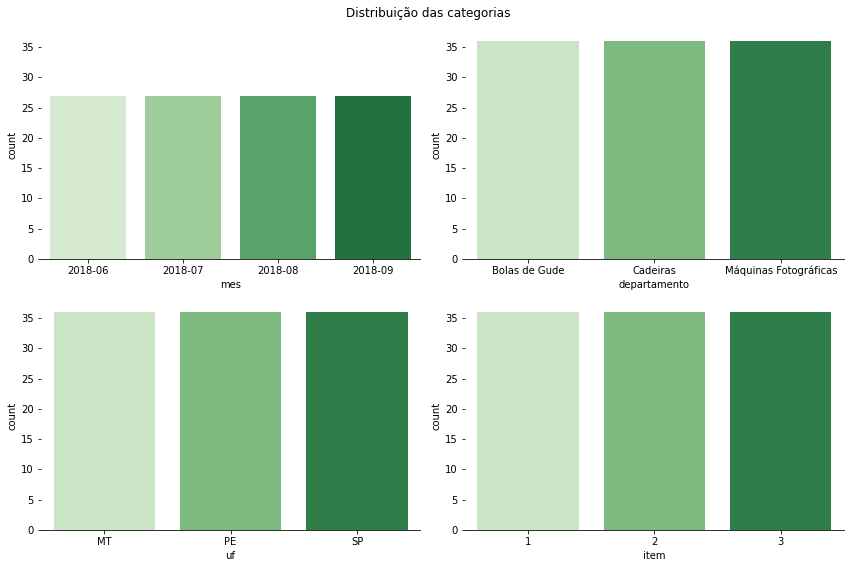

In [8]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
sns.despine(left=True)

sns.countplot(x="mes", data=df, ax=axes[0, 0],  palette="Greens")
sns.countplot(x="departamento", data=df, ax=axes[0, 1],  palette="Greens")
sns.countplot(x="uf", data=df, ax=axes[1, 0],  palette="Greens")
sns.countplot(x="item", data=df, ax=axes[1, 1],  palette="Greens")


# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Distribuição das categorias')
plt.tight_layout()

* As variáveis 'mes', 'departamento', 'uf' e 'item' estão uniformemente distribuídas.

Text(0.5, 0.98, 'Vendas por mês')

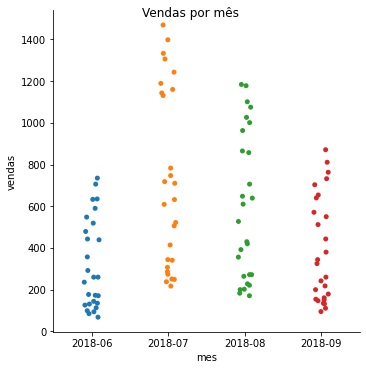

In [9]:
sns.catplot(x='mes', y='vendas', data=df)
plt.suptitle('Vendas por mês')

* Pico de vendas ocorreu em julho.

* Pode haver a influência de algum tipo de sazonalidade, por exemplo férias.

### 3.2 Faturamentos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [10]:
from matplotlib.ticker import FuncFormatter

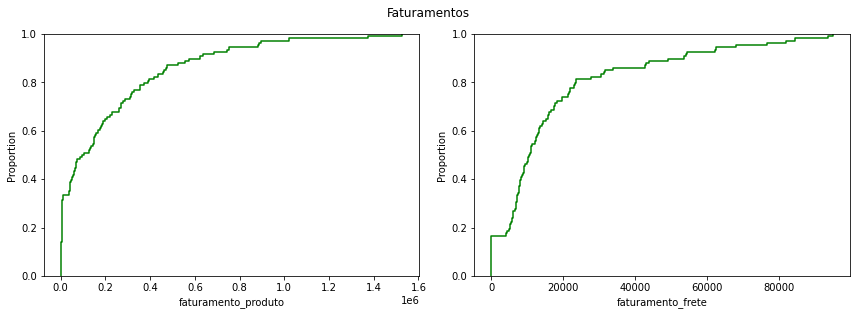

In [11]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['faturamento_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['faturamento_frete'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_xticklabels(xlabels)

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Faturamentos')
plt.tight_layout()

* Cerca de 38% dos produtos gera um faturamento um pouco acima de zero.

* Cerca de 75% dos produtos gera um faturamento de frete de até 20000. Destes, 19% possui faturamento de até 5000.

### 3.3 Custos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

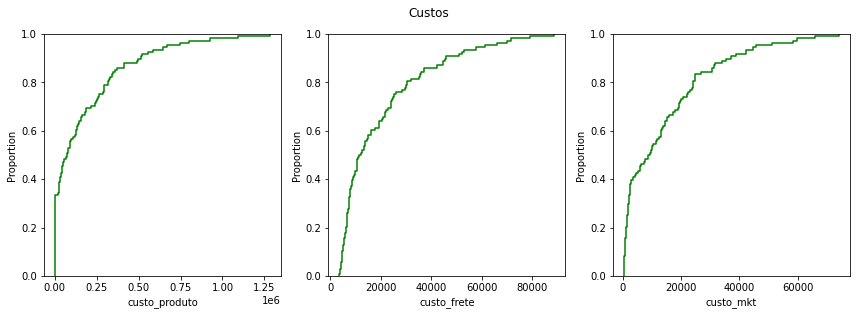

In [12]:
f, axes = plt.subplots(2, 3, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['custo_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['custo_frete'], ax=axes[0, 1],  color="green")
sns.ecdfplot(df['custo_mkt'], ax=axes[0, 2],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])
f.delaxes(ax=axes[1, 2])

# xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_xticklabels(xlabels)

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Custos')
plt.tight_layout()

* Por volta de 38% dos produtos acumula custo zero.  

* 40% dos produtos tem um custo do frete de até 10000.

* O custo em marketing de 40% dos produtos é um pouco maior do que zero.

### 3.4 Descontos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

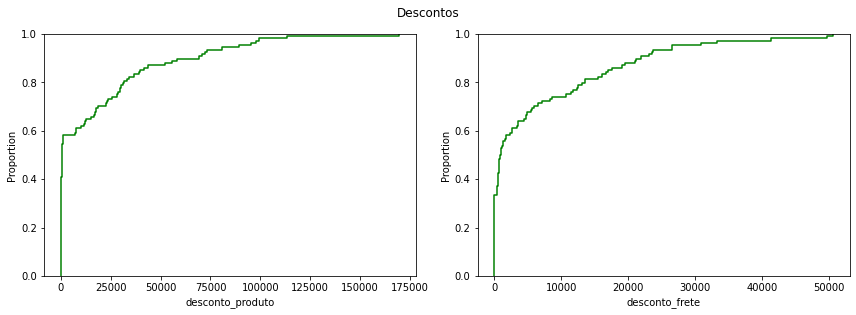

In [13]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['desconto_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['desconto_frete'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Descontos')
plt.tight_layout()

* 60% dos produtos possuem nenhum ou um pequeno desconto.

* Cerca de 35% dos produtos possuem nenhum ou um pequeno desconto no frete.

### 3.5 Visitas & Vendas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

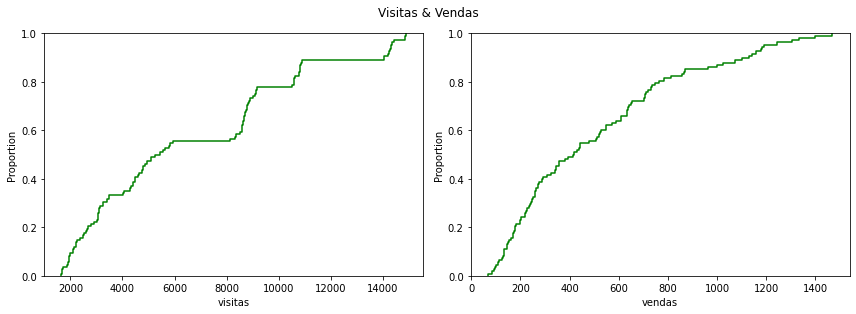

In [14]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['visitas'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['vendas'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Visitas & Vendas')
plt.tight_layout()

Text(0.5, 0.98, 'Visitas x Vendas')

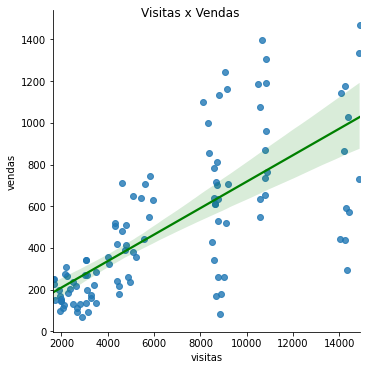

In [15]:
# linearity
sns.lmplot(x='visitas', y='vendas', data=df, line_kws={'color': 'green'})
plt.suptitle('Visitas x Vendas')

* Conforme aumenta o número de visitas, aumenta o número de vendas apesar de haver alguns *gaps*.

* A maior parte das visitas concentram-se em até 6000 com as vendas não ultrapassando 600, ou seja, vendas 10 vezes menor do que o número de visitas.

## 4. Estatísticas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [16]:
print('Descritiva das variáveis numéricas:')
df.iloc[:, 4:].describe()

Descritiva das variáveis numéricas:


,faturamento_produto,faturamento_frete,custo_produto,custo_frete,custo_mkt,desconto_produto,desconto_frete,visitas,vendas
count,1.080000e+02,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2.175414e+05,17943.409259,1.751534e+05,19839.638889,14147.648148,18084.976852,6672.683333,6658.250000,505.953704
std,2.932318e+05,21241.771405,2.461311e+05,18550.861609,16021.860014,30638.421133,10717.614058,4022.134564,356.800617
min,1.977900e+03,0.000000,5.600000e+02,3470.000000,347.000000,0.000000,0.000000,1653.000000,68.000000
25%,5.308125e+03,6091.200000,1.944750e+03,6715.750000,1653.250000,0.000000,0.000000,3074.250000,217.750000
50%,1.002930e+05,10580.000000,7.332000e+04,11770.000000,9045.000000,526.250000,902.000000,5330.500000,417.000000
75%,3.159056e+05,21438.000000,2.688500e+05,25560.000000,22012.500000,28135.625000,10860.000000,9091.250000,707.000000
max,1.527660e+06,94784.000000,1.283400e+06,88860.000000,74050.000000,169740.000000,50600.000000,14873.000000,1469.000000


In [17]:
print('Descritiva das variáveis categóricas:')
df.iloc[:, :4].astype('object').describe()

Descritiva das variáveis categóricas:


,mes,departamento,uf,item
count,108,108,108,108
unique,4,3,3,3
top,2018-09,Cadeiras,PE,3
freq,27,36,36,36


Correlação entre as variáveis:


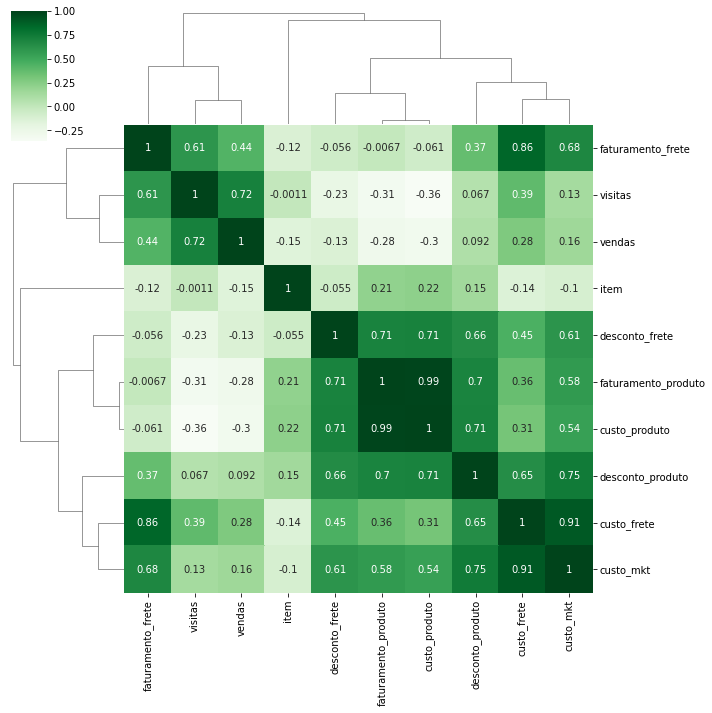

In [18]:
print('Correlação entre as variáveis:')
corr = df.corr()
sns.clustermap(corr, cmap='Greens', annot = True, figsize=(10, 10))


* As variáveis que mais se correlacionam com 'vendas' são: 

    * 1º 'visitas'
    
    * 2º 'faturamento_frete'
    
    * 3º 'custo_frete'
    
* 'faturamento_produto' está altamente correlacionado com 'custo_produto'.

* 'visitas' e 'vendas' possuem correlação negativa com 'custo_produto' e 'faturamento_produto'.

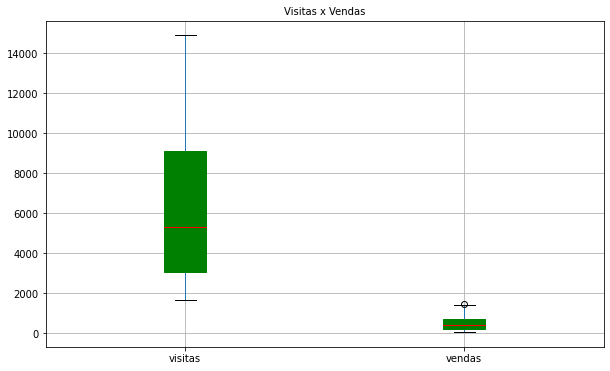

In [19]:
# boxplot
plt.figure(figsize=(10, 6))
df[['visitas', 'vendas']].boxplot(patch_artist=True, boxprops=dict(facecolor='green', color='green'), 
               medianprops=dict(color='red'))
plt.title("Visitas x Vendas", fontsize=10)
plt.show()

* O número de visitas possui uma distribuição bem ampla, ao contrário do número de vendas que não ultrapassou a marca de 2000.

## 5. Questões
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [20]:
# copy dataframe
df_ = df.copy()

In [21]:
# add calculated variables to dataframe 
df_['faturamento_total'] = df_['faturamento_produto'] + df_['faturamento_frete']
df_['custo_total'] = df_['custo_produto'] + df_['custo_frete'] + df_['custo_mkt']
df_['desconto_total'] = df_['desconto_produto'] + df_['desconto_frete'] 
df_['lucro'] = df_['faturamento_total'] - df_['custo_total'] - df_['desconto_total']
df_['conversao'] = df_['vendas'] / df_['visitas']

* Variáveis incluídas: 

    * faturamento_total = faturamento_produto + faturamento_frete
    
    * custo_total = custo_produto + custo_produto + custo_mkt
    
    * desconto_total = desconto_produto + desconto_frete
    
    * lucro = faturamento_total - custo_total - desconto_total
    
    * conversao = vendas / visitas

**Quais os departamentos com mais faturamento?**

In [22]:
df_.groupby('departamento').agg({'faturamento_total': ['sum']})

,faturamento_total
,sum
departamento,
Bolas de Gude,464448.7
Cadeiras,6141458.0
Máquinas Fotográficas,18826450.0


* O departamento Máquinas Fotográficas apresenta o maior faturamento.

**E com mais lucro?**

In [23]:
df_.groupby('departamento').agg({'lucro': ['sum']})

,lucro
,sum
departamento,
Bolas de Gude,111036.4
Cadeiras,-234484.0
Máquinas Fotográficas,294780.0


* Máquinas Fotográficas retornou o maior lucro no período. 

* O departamento Cadeiras apresentou prejuízo.

**Qual ação você sugere como mais efetiva para aumento de vendas, investimento em propaganda, desconto em preço ou desconto em frete e porquê?**

In [24]:
df_.groupby(['departamento']).agg({'conversao': ['max','mean']})

conversao          
                            max      mean
departamento                             
Bolas de Gude          0.154214  0.098590
Cadeiras               0.111834  0.058347
Máquinas Fotográficas  0.151845  0.082038

* Ao analisar a métrica de conversão percebe-se que o consumidor visita o site mas não compra, ou seja, não converte em vendas. 

* O investimento em marketing é pequeno ou nulo para a maioria dos produtos, mas aumentar o investimento não fará diferença na métrica de conversão se o consumidor visitar o site mas não comprar.

* Uma sugestão para aumentar as vendas é aumentar a proporção de produtos com desconto, pois quase 60% dos produtos possuem nenhum ou um desconto muito pequeno. 

* Outra sugestão é aumentar o desconto no frete: 35% dos produtos possui nenhum ou um desconto muito pequeno.

**Outras conclusões importantes**

Text(0.5, 1.0, 'Visitas x Vendas')

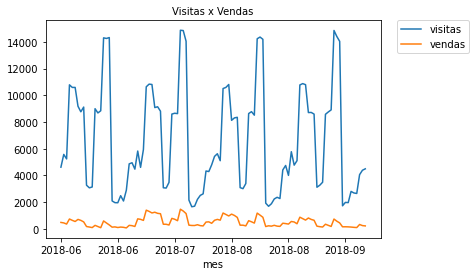

In [25]:
df[['mes','visitas','vendas']].plot('mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visitas x Vendas", fontsize=10)

* A linha que representa as vendas estão bem "descoladas" da linha de visitas.

Text(0.5, 1.0, 'Faturamento_frete x Custo_frete')

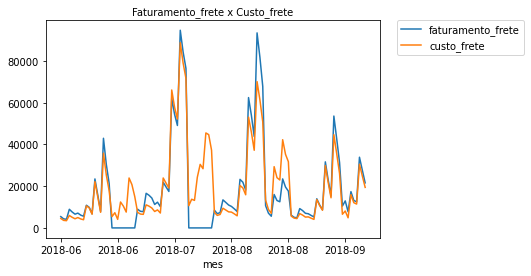

In [26]:
df[['mes','faturamento_frete','custo_frete']].plot('mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Faturamento_frete x Custo_frete", fontsize=10)

* A diferença entre faturamento_frete e custo_frete se sobrepõe em alguns pontos, mas em outros se desgrudam apresentando ora prejuízo, ora um lucro com o frete.

Text(0.5, 1.0, 'Faturamento_total x Custo_total')

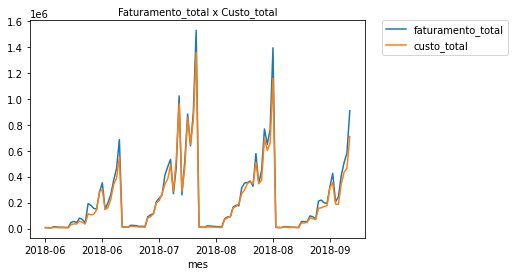

In [27]:
df_[['mes','faturamento_total','custo_total']].plot('mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Faturamento_total x Custo_total", fontsize=10)

* No período analisado o faturamento com o produto tem sido maior do que o custo com o mesmo somente nos picos com maior venda. 

* Em alguns pontos faturamento e custo ficam par a par, o que demonstra uma margem de lucro bem restrita. 

## 6. Dados externos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

* O total de vendas por mês apresenta certa sazonalidade. No período analisado, o menor total ocorreu no mês de junho, o pico em julho e a partir daí descresceu até setembro. 

In [28]:
print('Total de vendas por mês:')
df.groupby(by='mes')[['vendas']].sum().sort_values(by='vendas', ascending=False)

Total de vendas por mês:


,vendas
mes,
2018-07,19520
2018-08,15991
2018-09,10484
2018-06,8648


* No mês de julho há férias escolares mas também coincide com o período do inverno que se inicia no final de junho e se extende até o final de setembro. Sendo assim, foram incluídos dados históricos sobre a temperatura média nos meses de inverno.

| Mês | Estado | Minima (°C) | Máxima (°C) | Temperatura média (°C) |
|:--|:--:|:--:|:--:|:--:|
| Junho | MT | 18° | 28° | 23° |
| Julho	| MT | 18° | 31° | 24.5° |
| Agosto | MT |	19°	| 32° |	25.5° |
| Setembro | MT | 21° |	34° | 27.5° |
| Junho | PE | 22° | 28° | 25° |
| Julho | PE | 22° | 27° | 24.5° |
| Agosto | PE | 22° | 28° | 25° |
| Setembro | PE | 22° | 28° | 25° |
| Junho | SP | 14° | 23° | 18.5° |
| Julho | SP | 13° | 24° | 18.5° |
| Agosto | SP | 13° | 22° | 17.5° |
| Setembro | SP | 15° | 25° | 20° |

Fonte: https://www.climatempo.com.br/climatologia/558/saopaulo-sp

In [29]:
# temp_media_mt = {'2018-06': 23, '2018-07': 24.5, '2018-08': 25.5, '2018-09': 27.5}
# temp_media_pe = {'2018-06': 25, '2018-07': 24.5, '2018-08': 25, '2018-09': 25} 
# temp_media_sp = {'2018-06': 18.5, '2018-07': 18.5, '2018-08': 17.5, '2018-09': 20}

# for index, row in df_.iterrows():
#     #print(row["mes"], row["uf"])
#     if row['uf'] == 'MT':
#         df_['temp_media'] = df_['mes'].map(temp_media_mt)
#     elif row['uf'] == 'PE':
#         df_['temp_media'] = df_['mes'].map(temp_media_pe)
#     elif  row['uf'] == 'SP':
#         df_['temp_media'] = df_['mes'].map(temp_media_sp)

In [30]:
df_['temp_media'] = [23.0, 23.0, 23.0, 25.0, 25.0, 25.0, 18.5, 18.5, 18.5, 23.0,
                    23.0, 23.0, 25.0, 25.0, 25.0, 18.5, 18.5, 18.5, 23.0, 23.0,
                    23.0, 25.0, 25.0, 25.0, 18.5, 18.5, 18.5, 24.5, 24.5, 24.5,
                    24.5, 24.5, 24.5, 18.5, 18.5, 18.5, 24.5, 24.5, 24.5, 24.5,
                    24.5, 24.5, 18.5, 18.5, 18.5, 24.5, 24.5, 24.5, 24.5, 24.5,
                    24.5, 18.5, 18.5, 18.5, 25.5, 25.5, 25.5, 25.0, 25.0, 25.0,
                    17.5, 17.5, 17.5, 25.5, 25.5, 25.5, 25.0, 25.0, 25.0, 17.5,
                    17.5, 17.5, 25.5, 25.5, 25.5, 25.0, 25.0, 25.0, 17.5, 17.5,
                    17.5, 27.5, 27.5, 27.5, 25.0, 25.0, 25.0, 20.0, 20.0, 20.0,
                    27.5, 27.5, 27.5, 25.0, 25.0, 25.0, 20.0, 20.0, 20.0, 27.5,
                    27.5, 27.5, 25.0, 25.0, 25.0, 20.0, 20.0, 20.0]

Text(0.5, 0.98, 'Temperatura média x Vendas')

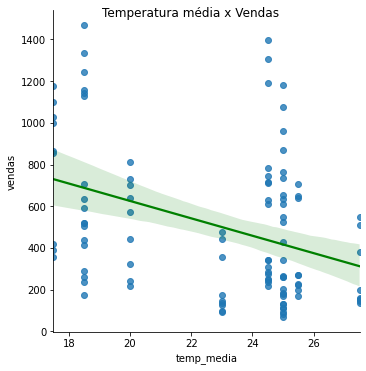

In [31]:
sns.lmplot(x='temp_media', y='vendas', data=df_, line_kws={'color': 'green'})
plt.suptitle('Temperatura média x Vendas')

* O gráfico mostra que quanto menor a temperatura média maior o volume de vendas.

* Seria importante saber quais os tipos de produtos que mais vendem no período de alta. Desta forma, podería-se criar uma estratégia de preços (descontos) para os produtos mais procurados.

## 7. Regressão linear
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

### 7.1 Multicolinearidade
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

Factor de Variação da Inflação (**VIF** - Variance Inflation Factor)

* Se VIF = 1: sem multicolinearidade

* Se VIF <= 5: baixa multicolinearidade ou moderadamente correlacionada

* Se VIF >= 5: multicolinearidade elevada ou altamente correlacionada

In [33]:
# droped: 'faturamento_total', 'custo_total', 'desconto_total', 'lucro', 'conversao'
cols = ['faturamento_produto', 'faturamento_frete', 'custo_produto', 'custo_frete', 'custo_mkt',
           'desconto_produto', 'desconto_frete','visitas', 'temp_media']
y = df_["vendas"] # target response
X = pd.DataFrame(columns=[cols], data=df_[cols].values)
col_name = X.columns # column list

In [34]:
# VIF
for index in range(0, len(col_name)):
    model = sm.OLS(y, X)                       # fit ordinary least squares method
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print("R Square value of '{}' is {} keeping all other columns as independent features.".format(col_name[index], (round(rsq, 2))))
    print("VIF of '{}' is {}".format(col_name[index], vif))

R Square value of '('faturamento_produto',)' is 0.86 keeping all other columns as independent features.
VIF of '('faturamento_produto',)' is 7.29
R Square value of '('faturamento_frete',)' is 0.86 keeping all other columns as independent features.
VIF of '('faturamento_frete',)' is 7.29
R Square value of '('custo_produto',)' is 0.86 keeping all other columns as independent features.
VIF of '('custo_produto',)' is 7.29
R Square value of '('custo_frete',)' is 0.86 keeping all other columns as independent features.
VIF of '('custo_frete',)' is 7.29
R Square value of '('custo_mkt',)' is 0.86 keeping all other columns as independent features.
VIF of '('custo_mkt',)' is 7.29
R Square value of '('desconto_produto',)' is 0.86 keeping all other columns as independent features.
VIF of '('desconto_produto',)' is 7.29
R Square value of '('desconto_frete',)' is 0.86 keeping all other columns as independent features.
VIF of '('desconto_frete',)' is 7.29
R Square value of '('visitas',)' is 0.86 keepi

* Todas as variáveis independentes possuem VIF = 7.29: alta correlação.

In [ ]:
# delete high correlation columns

threshold = 0.8
corr_matrix = X.corr().abs()
# corr_matrix.head()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper.head(10)

# select columns with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# to_drop

# drop columns from to_drop
X = X.drop(to_drop, axis=1) 

In [ ]:
print('Variáveis do modelo:')
print(f'- Independentes: {X.columns}')
print(f'- Dependente: {df.columns[-1]}')

### 7.2 Modelo
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

* 'faturamento_frete', depois de 'visitas', é a variável que mais correlaciona com 'vendas'. Portanto, será utilizada na predição de 'vendas' com um desconto de 10%.

In [ ]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercepto: \n', regr.intercept_)
print('Coeficientes: \n', regr.coef_)

# prediction with sklearn
desc_faturamento_frete = df_['faturamento_frete']*(1 - 0.1) # 10% de desconto em faturamento_frete
pred = regr.predict(X)
# print ('Predições de vendas: \n', pred)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

**vendas = (Intercepto) + (faturamento_produto)*X1 + (faturamento_frete)*X2 + (desconto_produto)*X3 + (desconto_frete)*X4 + (visitas)*X5  + (temp_media)*X6**

vendas = (677.2637) + (-0.0004)*X1 + (-0.0005)*X2 + (0.0028)*X3 + (0.0015)*X4 + (0.0479)*X5 + (-19.4786)*X6

R-squared = 0.556, ou seja, 56% dos dados se ajustam ao modelo de regressão. 

In [ ]:
sns.lmplot(x='faturamento_frete', y='vendas', data=df_, line_kws={'color': 'green'})
plt.suptitle('Faturamento_frete x Vendas (pré-desconto)')

* É possível notar que existe uma relação linear entre faturamento_frete e vendas.

* Sugestão: diminuir o faturamento com frete para aumentar as vendas.

In [ ]:
data = {'desc_faturamento_frete':  desc_faturamento_frete,
        'vendas_pred': pred}
# new dataframe with
data_pred = pd.DataFrame (data, columns = ['desc_faturamento_frete','vendas_pred'])

In [ ]:
sns.lmplot(x='desc_faturamento_frete', y='vendas_pred', data=data_pred, line_kws={'color': 'green'})
plt.suptitle('Faturamento_frete x Vendas (pós-desconto)')

In [ ]:
plt.plot(df['vendas'], df['faturamento_frete'], 'ro')
plt.plot(data_pred['vendas_pred'], data_pred['desc_faturamento_frete'], 'g^')
plt.xlabel('vendas')
plt.ylabel('faturamento_frete (com e sem desconto)')
plt.legend(["frete sem desconto", "frete com desconto"])
plt.suptitle('Vendas x faturamento_frete')

💡 Diminuir o faturamento com frete permite aumentar as vendas.